# Binomial option pricing

In [16]:
import derivatives as d

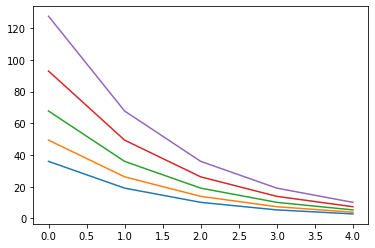

In [18]:
M=4
T = 10  # Time horizon for the binomial tree simulation.
S0 = 36  # Initial value of the risky asset.
sigma = 0.2  # Constant volatility factor.

a = d.simulate_tree_np(M, T, S0, sigma)
plt.plot(a)  

# Monte Carlo Simulation

In [20]:
#The number of time intervals for discretization
M = 100  
#The number of paths to be simulated
I = 50000 
# Initial value of the risky asset.
S0 = 36  
# Time horizon for the binomial tree simulation.
T = 10  
# Constant short rate.
r = 0.06  
# Constant volatility factor.
sigma = 0.2  


S = d.mcs_simulation_np(M, T, S0, I, sigma, r)

#The mean end-of-period value based on the simulation
S[-1].mean()


65.69306552766324

***
# Value at Risk

### A random walk simulation  

Modelling random walk movements of the USO oil ETF with a constant daily average return (mu) and average daily volatility (vol) over the course of T trading days.


In [11]:
import pandas as pd

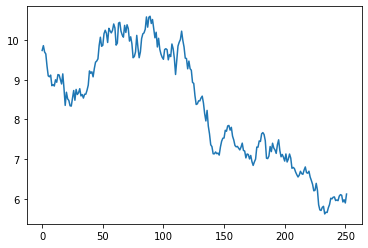

In [12]:
StockReturns = pd.read_csv("USO.csv")

# Set the simulation parameters
mu = np.mean(StockReturns)
vol = np.std(StockReturns)
T = 252  # number of simulated days
S0 = 10  # initial stock price 

# Add one to the random returns
rand_rets = np.random.normal(mu, vol, T) + 1

# Forecasted random walk
forecasted_values = S0*rand_rets.cumprod()

# Plot the random walk
plt.plot(range(0, T), forecasted_values)
plt.show()

### Monte Carlo simulations

Generating 100 Monte-Carlo simulations for the USO oil ETF.

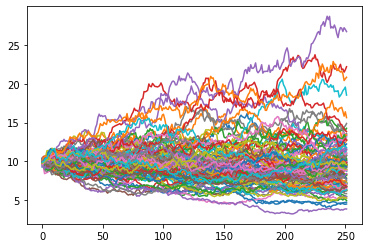

In [13]:
# Loop through 100 simulations
for i in range(100):

    # Generate the random returns
    rand_rets = np.random.normal(mu,vol,T) + 1
    
    # Create the Monte carlo path
    forecasted_values = S0*(rand_rets).cumprod()
    
    # Plot the Monte Carlo path
    plt.plot(range(T), forecasted_values)

# Show the simulations
plt.show()

### Monte Carlo VaR

Aggregating the returns data at each iteration, and use the resulting values to forecast parametric VaR(99).


In [15]:
# Aggregate the returns
sim_returns = []

# Loop through 100 simulations
for i in range(100):

    # Generate the Random Walk
    rand_rets = np.random.normal(mu, vol, T)
    
    # Save the results
    sim_returns.append(rand_rets)

# Calculate the VaR(99)
var_99 = np.percentile(sim_returns, 1)
print("Parametric VaR(99): ", round(100*var_99, 2),"%")

Parametric VaR(99):  -5.11 %
